In [1]:
link = input('Enter the link: ')
comments = []

import time
from selenium import webdriver
from selenium.webdriver import Chrome
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


op = webdriver.ChromeOptions()
op.add_argument('headless')

with Chrome(options=op) as driver:
    wait = WebDriverWait(driver,10)
    driver.get(link)

    for item in range(3): #by increasing the highest range you can get more content
        wait.until(EC.visibility_of_element_located((By.TAG_NAME, "body"))).send_keys(Keys.END)
        time.sleep(3)

    for comment in wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#comment #content-text"))):
        x = comment.text
        comments.append(x)
        print("\n",comment.text)


 So exciting! Thank you guys so much!

 those verses go so hard. the queen of songwriting is BACK baby

 we all Know the album gone be fire! we need more ASAP!! i loved this.

 I miss you Julia Michaels, the vibe of this song is so immacculate.

 To whoever is listening to this song now, wherever you are.... Sending you love, peace, healing and all good wishes. May your life be good

 independent juliaaaaa let’s gooooooooo!!!!!!! i LOVE this! you’re finally free!

 Trumpet player needs more recognition, that was amazing!!️ it made the song better than it already was such a vibe 

 Your music will always be seeded inside my soul. For some reasons I get nostalgic listening to your voice.

 Girlllll where have you been?! Or I have just been under a rock for a while. Love this queen!!!

 Julia Michaels genuinely one of the most talented artists working today <3

 BRINGING US EXACTLY WHAT WE NEED & WHEN WE NEED IT! YES, I AM SCREAMING AHHHH 

 I love you, Julia! I'm here for your soft life

In [2]:
# https://www.youtube.com/watch?v=npFE7NIy574

In [2]:
print(comments)

['So exciting! Thank you guys so much!', 'those verses go so hard. the queen of songwriting is BACK baby', 'we all Know the album gone be fire! we need more ASAP!! i loved this.', 'I miss you Julia Michaels, the vibe of this song is so immacculate.', 'To whoever is listening to this song now, wherever you are.... Sending you love, peace, healing and all good wishes. May your life be good', 'independent juliaaaaa let’s gooooooooo!!!!!!! i LOVE this! you’re finally free!', 'Trumpet player needs more recognition, that was amazing!!️ it made the song better than it already was such a vibe ', 'Your music will always be seeded inside my soul. For some reasons I get nostalgic listening to your voice.', 'Girlllll where have you been?! Or I have just been under a rock for a while. Love this queen!!!', 'Julia Michaels genuinely one of the most talented artists working today <3', 'BRINGING US EXACTLY WHAT WE NEED & WHEN WE NEED IT! YES, I AM SCREAMING AHHHH ', "I love you, Julia! I'm here for you

In [3]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
#from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
#from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
df = pd.DataFrame(comments,columns=["Comment"])

print(df)

                                              Comment
0                So exciting! Thank you guys so much!
1   those verses go so hard. the queen of songwrit...
2   we all Know the album gone be fire! we need mo...
3   I miss you Julia Michaels, the vibe of this so...
4   To whoever is listening to this song now, wher...
5   independent juliaaaaa let’s gooooooooo!!!!!!! ...
6   Trumpet player needs more recognition, that wa...
7   Your music will always be seeded inside my sou...
8   Girlllll where have you been?! Or I have just ...
9   Julia Michaels genuinely one of the most talen...
10  BRINGING US EXACTLY WHAT WE NEED & WHEN WE NEE...
11  I love you, Julia! I'm here for your soft life...
12               Song has been in my head for 4 days 
13  She drops a banger (s) every year.\nI always l...
14                      This was just what we needed 
15                      the album is gonna be HEAVEN.
16                    Aways happy to have Julia drop.
17  i've looked up to you / 

In [4]:
def data_processing(text):
    text = str(text)
    if not isinstance(text, str):
        return None
    text = re.sub(r"https\S+|www\S+https\S+", '', text, flags=re.MULTILINE)
    ...

    
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [5]:
import nltk
nltk.download('punkt')

df.text = df['Comment'].apply(data_processing)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tejat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\tejat\AppData\Local\Temp\ipykernel_29960\2968911166.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.text = df['Comment'].apply(data_processing)


In [6]:
df = df.drop_duplicates('Comment')

In [7]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [8]:
df['Comment'] = df['Comment'].apply(lambda x: stemming(x) if isinstance(x, str) else x)

In [9]:
df.head()

,Comment
0,So exciting! Thank you guys so much!
1,those verses go so hard. the queen of songwrit...
2,we all Know the album gone be fire! we need mo...
3,"I miss you Julia Michaels, the vibe of this so..."
4,"To whoever is listening to this song now, wher..."


In [10]:
print(df['Comment'].iloc[0],"\n")
print(df['Comment'].iloc[1],"\n")
print(df['Comment'].iloc[2],"\n")
print(df['Comment'].iloc[3],"\n")
print(df['Comment'].iloc[4],"\n")

So exciting! Thank you guys so much! 

those verses go so hard. the queen of songwriting is BACK baby 

we all Know the album gone be fire! we need more ASAP!! i loved this. 

I miss you Julia Michaels, the vibe of this song is so immacculate. 

To whoever is listening to this song now, wherever you are.... Sending you love, peace, healing and all good wishes. May your life be good 



In [11]:
df['Comment'].fillna('', inplace=True)

In [13]:
%pip install textblob

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
label-studio-converter 0.0.54rc0 requires nltk==3.6.7, but you have nltk 3.9.1 which is incompatible.
label-studio-converter 0.0.54rc0 requires Pillow==9.3.0, but you have pillow 9.5.0 which is incompatible.


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for TextBlob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
  Obtaining dependency information for nltk>=3.8 from https://files.pythonhosted.org/packages/4d/66/7d9e26593edda06e8cb531874633f7c2372279c3b0f46235539fe546df8b/nltk-3.9.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ------------------------------- ------- 512.0/626.3 kB 10.7 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 9.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -------------------------------- ------- 1.2/1.5 MB 39.3 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 23.7 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: 

In [14]:
from textblob import TextBlob

In [15]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [16]:
df['polarity'] = df['Comment'].apply(polarity)

In [17]:
df.head(10)

,Comment,polarity
0,So exciting! Thank you guys so much!,0.312500
1,those verses go so hard. the queen of songwrit...,-0.145833
2,we all Know the album gone be fire! we need mo...,0.740625
3,"I miss you Julia Michaels, the vibe of this so...",0.000000
4,"To whoever is listening to this song now, wher...",0.633333
5,independent juliaaaaa let’s gooooooooo!!!!!!! ...,0.375000
6,"Trumpet player needs more recognition, that wa...",0.333333
7,Your music will always be seeded inside my sou...,-0.500000
8,Girlllll where have you been?! Or I have just ...,0.976562
9,Julia Michaels genuinely one of the most talen...,0.650000


In [18]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [19]:
df['sentiment'] = df['polarity'].apply(sentiment)

In [20]:
df.head()

,Comment,polarity,sentiment
0,So exciting! Thank you guys so much!,0.312500,Positive
1,those verses go so hard. the queen of songwrit...,-0.145833,Negative
2,we all Know the album gone be fire! we need mo...,0.740625,Positive
3,"I miss you Julia Michaels, the vibe of this so...",0.000000,Neutral
4,"To whoever is listening to this song now, wher...",0.633333,Positive


<Axes: xlabel='sentiment', ylabel='count'>

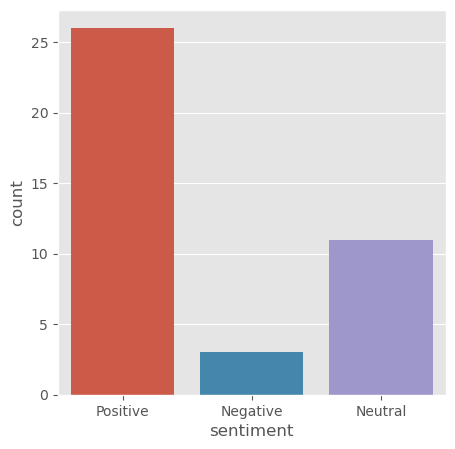

In [21]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = df)

Text(0.5, 1.0, 'Distribution of sentiments')

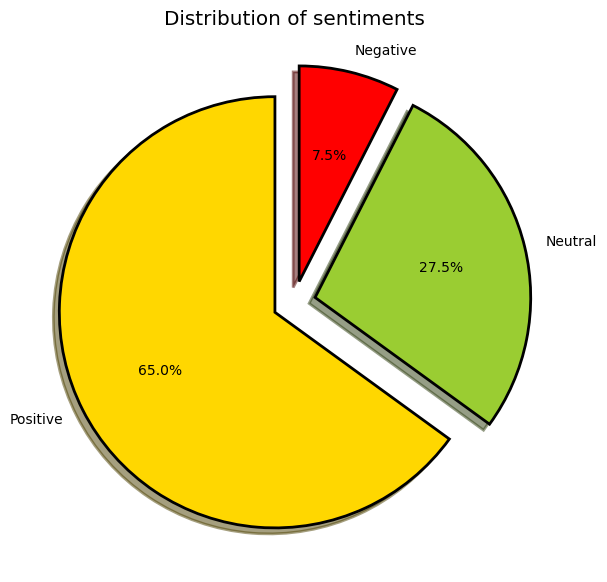

In [22]:
fig = plt.figure(figsize=(7,7))
colors = ("gold", "yellowgreen", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [23]:
pos_tweets = df[df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,Comment,polarity,sentiment
35,INCREDIBLE song writing!,1.000000,Positive
33,So Great Song !!! Thank you !!!,1.000000,Positive
8,Girlllll where have you been?! Or I have just ...,0.976562,Positive
18,One of the best songs released this year! On r...,0.890625,Positive
16,Aways happy to have Julia drop.,0.800000,Positive


In [24]:
pos_tweets = df[df.sentiment == 'Negative']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,Comment,polarity,sentiment
1,those verses go so hard. the queen of songwrit...,-0.145833,Negative
37,"Oh, how we've been missing you baby!",-0.250000,Negative
7,Your music will always be seeded inside my sou...,-0.500000,Negative
